In [ ]:
import pandas as pd
import numpy as np
import astropy
import sunpy
from sunpy.time import parse_time
import matplotlib.pyplot as plt
import seaborn as sns
#make figures bigger
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.figsize"] = (10,5)

In [2]:
filtered_ic = pd.read_csv('helio4cast_icmecat.csv')

# Histograms

Text(0.5, 0, 'Magnetic Field Strength (nT)')

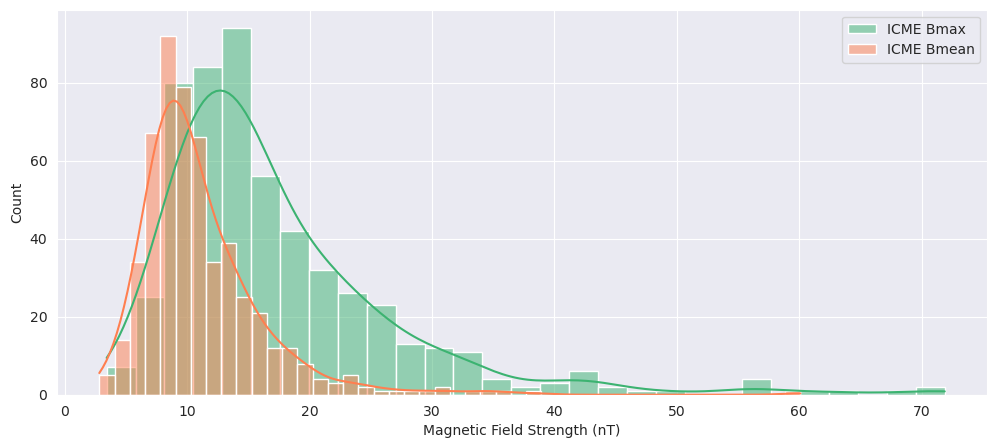

In [3]:
sns.set_style("darkgrid")

plt.figure(figsize=(12,5))
sns.histplot(filtered_ic.icme_bmax, label='ICME Bmax',color='mediumseagreen',kde=True)
sns.histplot(filtered_ic.icme_bmean, label='ICME Bmean',color='coral',alpha=0.5,kde=True)
plt.legend(loc=1)
plt.xlabel('Magnetic Field Strength (nT)')

Text(0.5, 0, 'Duration (hours)')

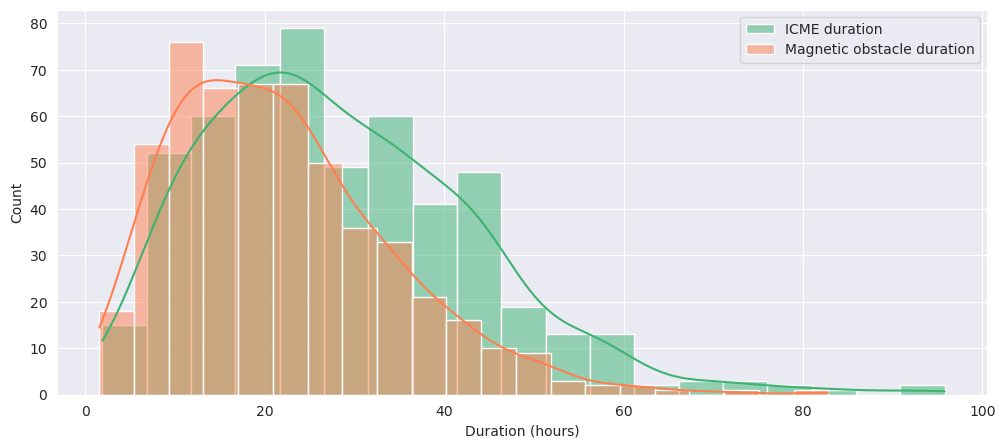

In [4]:
plt.figure(figsize=(12,5))
sns.histplot(filtered_ic.icme_duration, label='ICME duration',color='mediumseagreen',kde=True)
sns.histplot(filtered_ic.mo_duration, label='Magnetic obstacle duration',color='coral',alpha=0.5,kde=True)
plt.legend(loc=1)
plt.xlabel('Duration (hours)')

Text(0.5, 0, 'Speed (km/s)')

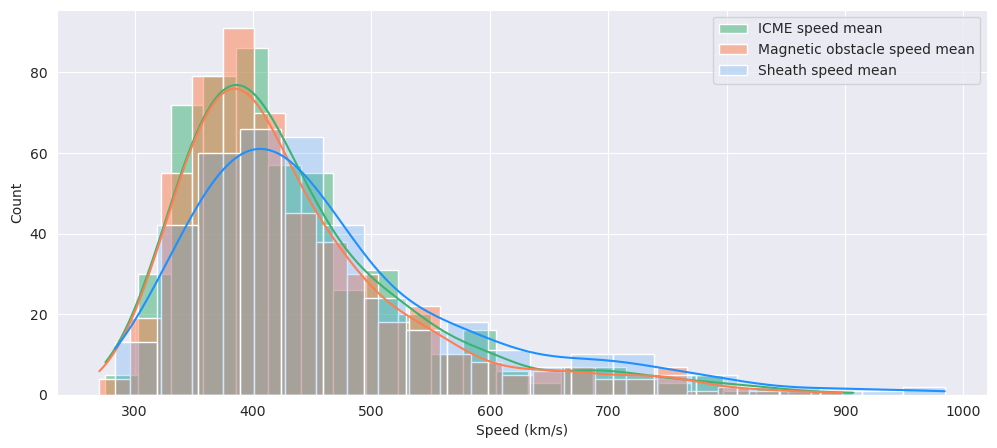

In [5]:
plt.figure(figsize=(12,5))
sns.histplot(filtered_ic.icme_speed_mean, label='ICME speed mean',color='mediumseagreen',kde=True)
sns.histplot(filtered_ic.mo_speed_mean, label='Magnetic obstacle speed mean',color='coral',alpha=0.5,kde=True)
sns.histplot(filtered_ic.sheath_speed_mean, label='Sheath speed mean', color='dodgerblue', alpha=0.2, kde=True)
plt.legend(loc=1)
plt.xlabel('Speed (km/s)')

Text(0.5, 0, 'Density (cm^-3)')

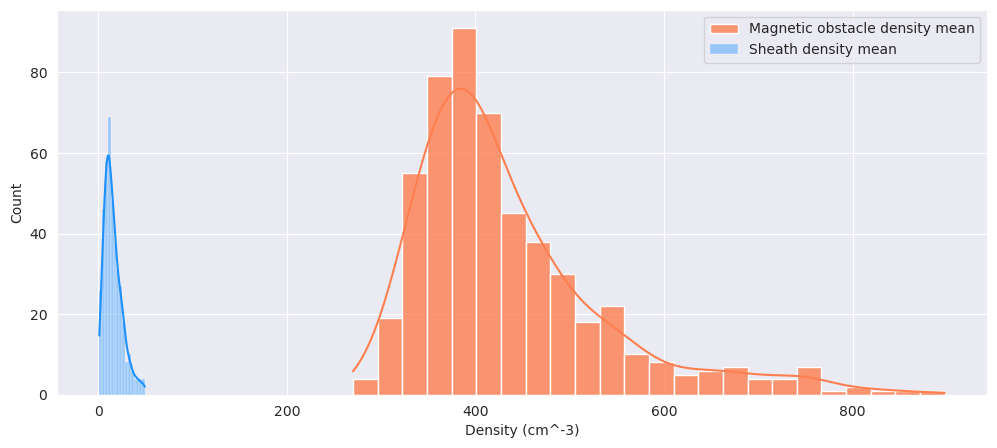

In [6]:
plt.figure(figsize=(12,5))
sns.histplot(filtered_ic.mo_speed_mean, label='Magnetic obstacle density mean',color='coral',alpha=0.8,kde=True)
sns.histplot(filtered_ic.sheath_density_mean, label='Sheath density mean', color='dodgerblue', alpha=0.4, kde=True)
plt.legend(loc=1)
plt.xlabel('Density (cm^-3)')

Text(0.5, 0, 'Time difference (hours)')

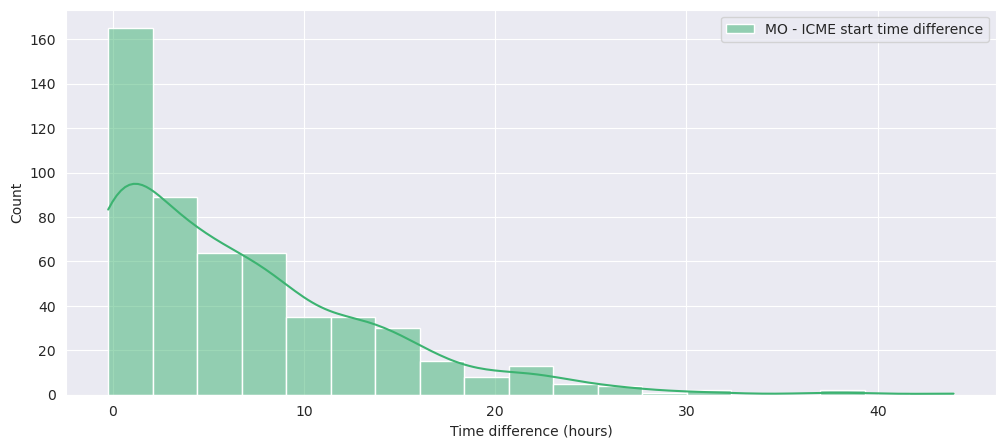

In [7]:
from astropy.time import TimeDelta

# time between ICME and MO in hours
ICME_start_time = parse_time(filtered_ic.icme_start_time)
MO_start_time = parse_time(filtered_ic.mo_start_time)

diff_start_time = MO_start_time - ICME_start_time
# Convert to hours
diff_start_time_hours = diff_start_time.to('hour').value

# icme_duration is in hours
icme_duration_seconds = filtered_ic.icme_duration * 3600  # Convert to seconds

# If it's a single value:
ICME_end_time = ICME_start_time + TimeDelta(icme_duration_seconds, format='sec')

MO_end_time = parse_time(filtered_ic.mo_end_time)

diff_end_time = MO_end_time - ICME_end_time
# Convert to hours
diff_end_time_hours = diff_end_time.to('hour').value

plt.figure(figsize=(12,5))
sns.histplot(diff_start_time_hours, label='MO - ICME start time difference',color='mediumseagreen',kde=True)
# sns.histplot(diff_end_time_hours, label='MO - ICME end time difference',color='coral',alpha=0.5,kde=True)
plt.legend(loc=1)
plt.xlabel('Time difference (hours)')

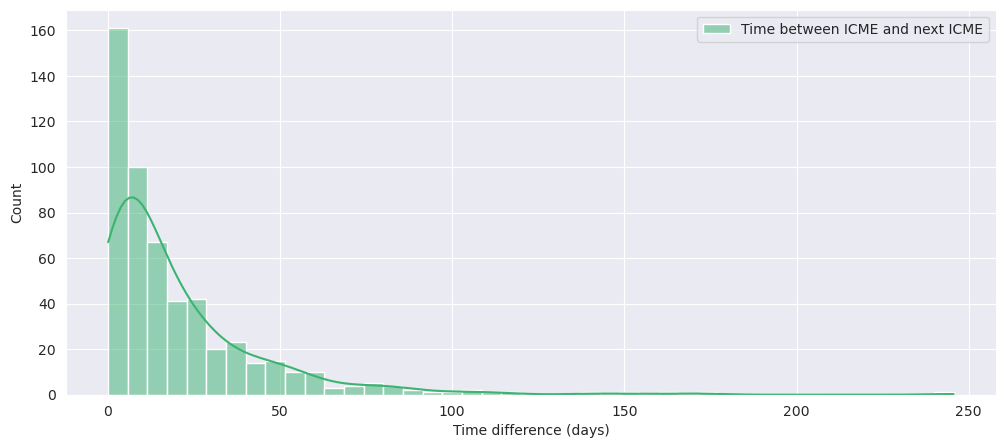

In [ ]:
time_between_ICME = ICME_start_time[:-1] - ICME_start_time[1:]

plt.figure(figsize=(12,5))
sns.histplot(time_between_ICME.to('day').value, label='Time between ICME and next ICME',color='mediumseagreen',kde=True)
plt.xlabel('Time difference (days)')
# sns.histplot(time_between_ICME.to('hour').value, label='Time between ICME and next ICME',color='mediumseagreen',kde=True)
# plt.xlabel('Time difference (hours)')
plt.legend(loc=1)
plt.show()